In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
#data=pd.read_csv('/content/gdrive/My Drive/data_prepr.csv')
data5=pd.read_csv('/content/gdrive/My Drive/complete_prep .csv')
data5['word_count'] = data5['Text'].apply(lambda x: len(str(x).split(" ")))
print (len(data5[data5["word_count"] >=3]))
data_c1=data5[data5["word_count"] >=3]
print(data_c1)

83591
                                                    Text  Class  word_count
0      solut like tax reform trade promot author woul...      0          17
1      sc seen year wconsecut feder disast declar bet...      0          11
2                      rt fantast mt unit introduct peak      0           6
3      thank honor among year list remark woman fight...      1          12
4      let u take time rememb heroic soul stood count...      1          12
...                                                  ...    ...         ...
84912           rt deni scienc let environment regul ...      1           7
84913     anyth say amend gun ownership abl say face ...      1           9
84914  rt room today welcom back america three wrong ...      1          10
84915  u creat cultur violenc toler survivor support ...      1           8
84916                   rt award go leadership inspi ...      1           6

[83591 rows x 3 columns]


In [ ]:
text1=data_c1["Text"].tolist()
label1=data_c1["Class"].tolist()

In [ ]:
!pip install tensorflow_datasets

In [ ]:
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size=10000
tokenizer=tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(text1,vocab_size,max_subword_length=5)

In [ ]:
print("vocab size is",vocab_size)

#check the tokenizer words
num=1
print(text1[num])
encoded_sentence=tokenizer.encode(text1[num])
print(encoded_sentence)

vocab size is 10000
sc seen year wconsecut feder disast declar better respond storm ...
[2806, 1151, 34, 4029, 3501, 8215, 4, 142, 9523, 737, 4, 1377, 3, 285, 3, 235, 159, 1328, 1]


In [ ]:
for i in encoded_sentence:
    print(tokenizer.decode([i]))

sc 
seen 
year 
wc
ons
ecu
t 
feder
 
disas
t 
decla
r 
bette
r 
respo
nd 
storm
 ...


In [ ]:
for i,sent in enumerate(text1):
    text1[i]=tokenizer.encode(sent)

In [ ]:
for i in range(10):
    print(text1[i],end="\n")

[421, 80, 10, 102, 383, 696, 430, 63, 81, 295, 110, 675, 20, 231, 6932, 367, 1809]
[2697, 935, 13, 8069, 2570, 1938, 2190, 88, 741, 1512, 224, 631, 3735, 1]
[2, 1824, 2239, 239, 2982, 4971, 10114]
[5, 17, 814, 13, 747, 721, 34, 112, 400, 577, 163, 1]
[125, 8, 47, 21, 200, 2922, 3843, 1380, 65, 293, 572, 1]
[2, 952, 51, 3978, 1514, 350, 216, 1]
[13, 131, 134, 26, 311, 3234, 1]
[2, 510, 791, 85, 15, 542, 1031, 3978, 532, 604, 163, 1]
[262, 6255, 5636, 423, 1228, 8, 435, 632, 2494, 2607, 2702, 501, 3147, 3992, 4629]
[28, 65, 293, 6, 140, 293, 6, 101, 45, 686, 1204, 1]


In [ ]:
import numpy as np
max_length =50
trunc_type='pre'
padding_type='pre'

#pad all Sequence

sequence_added=pad_sequences(text1,maxlen=max_length,padding =padding_type,truncating=trunc_type)

In [ ]:
#Separate the separate and Sentences on training and test data sets

training_size=int(len(text1)*0.9)
train_seq=sequence_added[:training_size]
train_labels=label1[:training_size]

test_seq=sequence_added[training_size:]
test_labels=label1[training_size:]

train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [ ]:
print("Total no of Training Sequence are",len(train_seq))
print("Total no of Test Sequence are",len(test_seq))

Total no of Training Sequence are 75231
Total no of Test Sequence are 8360


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Bidirectional,Conv1D,MaxPooling1D,Dropout
from keras.layers.embeddings import Embedding
EMBEDDING_DIM=32
model=Sequential()
model.add(Embedding(vocab_size+1,EMBEDDING_DIM,input_length=50,embeddings_initializer='he_uniform'))
model.add(Conv1D(filters=32,kernel_size=7,padding='same',kernel_initializer='he_uniform'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(256,return_sequences=True,kernel_initializer='he_uniform')))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256,kernel_initializer='he_uniform')))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 32)            320032    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 50, 32)            7200      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 25, 512)           591872    
_________________________________________________________________
dropout_24 (Dropout)         (None, 25, 512)           0         
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 512)               1574912   
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)              

In [ ]:
history=model.fit(train_seq,train_labels,epochs=35,validation_data=(test_seq,test_labels))

Epoch 1/35
2351/2351 [==============================] - 46s 18ms/step - loss: 0.6153 - accuracy: 0.6487 - val_loss: 0.5428 - val_accuracy: 0.7116
Epoch 2/35
2351/2351 [==============================] - 40s 17ms/step - loss: 0.4843 - accuracy: 0.7589 - val_loss: 0.5469 - val_accuracy: 0.7141
Epoch 3/35
2351/2351 [==============================] - 40s 17ms/step - loss: 0.3816 - accuracy: 0.8216 - val_loss: 0.5875 - val_accuracy: 0.7161
Epoch 4/35
2351/2351 [==============================] - 39s 16ms/step - loss: 0.2848 - accuracy: 0.8738 - val_loss: 0.6912 - val_accuracy: 0.7128
Epoch 5/35
2351/2351 [==============================] - 40s 17ms/step - loss: 0.2020 - accuracy: 0.9143 - val_loss: 1.0107 - val_accuracy: 0.6982
Epoch 6/35
2351/2351 [==============================] - 40s 17ms/step - loss: 0.1506 - accuracy: 0.9388 - val_loss: 1.0791 - val_accuracy: 0.7067
Epoch 7/35
2351/2351 [==============================] - 40s 17ms/step - loss: 0.1130 - accuracy: 0.9554 - val_loss: 1.1592 -

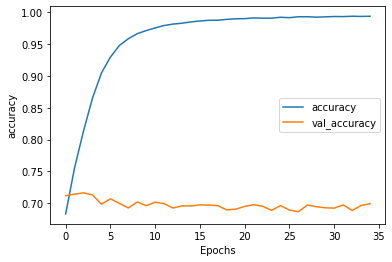

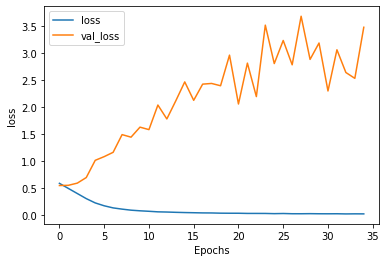

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
        plt.plot(history.history[string])
        plt.plot(history.history['val_'+string])
        plt.xlabel("Epochs")
        plt.ylabel(string)
        plt.legend([string, 'val_'+string])
        plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
y_pred=model.predict(test_seq)
print(y_pred)

[[1.        ]
 [0.9669534 ]
 [0.01064152]
 ...
 [0.99877924]
 [1.        ]
 [0.999199  ]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,matthews_corrcoef
print(classification_report(test_labels,np.round(y_pred).astype(int)))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      4235
           1       0.69      0.70      0.70      4125

    accuracy                           0.70      8360
   macro avg       0.70      0.70      0.70      8360
weighted avg       0.70      0.70      0.70      8360



In [ ]:
print(accuracy_score(test_labels,np.round(y_pred).astype(int)))

0.6990430622009569


In [ ]:
cm=confusion_matrix(test_labels,np.round(y_pred>0.5).astype(int))
print(cm)

[[2961 1274]
 [1242 2883]]


In [ ]:
print(matthews_corrcoef(test_labels,np.round(y_pred).astype(int)))

0.39805420892793825
